### Non-parametric embedding with UMAP. 
This notebook shows an example of a non-parametric embedding using the same training loops as are used with a parametric embedding. 

### load data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [2]:
from umap.parametric_umap import ParametricUMAP

In [3]:
embedder = ParametricUMAP(parametric_embedding=False, verbose=True)

/mnt/cube/tsainbur/Projects/github_repos/umap/umap/parametric_umap.py:129: UserWarning: tensorflow_probability not installed.                 Setting global_correlation_loss_weight to zero.
  warn(


In [4]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f07143a48b0>,
               parametric_embedding=False)
Construct fuzzy simplicial set
Fri Apr 16 09:06:11 2021 Finding Nearest Neighbors
Fri Apr 16 09:06:11 2021 Building RP forest with 17 trees
Fri Apr 16 09:06:13 2021 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Fri Apr 16 09:06:22 2021 Finished Nearest Neighbor Search
Fri Apr 16 09:06:24 2021 Construct embedding
Epoch 1/10


/home/AD/tsainbur/anaconda3/envs/umap_dev_new/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


100/100 [==============================] - 27s 266ms/step - loss: 0.0487
Epoch 2/10
100/100 [==============================] - 23s 232ms/step - loss: 0.0356
Epoch 3/10
100/100 [==============================] - 22s 221ms/step - loss: 0.0331
Epoch 4/10
100/100 [==============================] - 22s 222ms/step - loss: 0.0317
Epoch 5/10
100/100 [==============================] - 21s 215ms/step - loss: 0.0309
Epoch 6/10
100/100 [==============================] - 21s 214ms/step - loss: 0.0303
Epoch 7/10
100/100 [==============================] - 22s 217ms/step - loss: 0.0300
Epoch 8/10
100/100 [==============================] - 21s 212ms/step - loss: 0.0297
Epoch 9/10
100/100 [==============================] - 22s 216ms/step - loss: 0.0294
Epoch 10/10
100/100 [==============================] - 22s 218ms/step - loss: 0.0293
Fri Apr 16 09:11:04 2021 Finished embedding


### plot results

In [5]:
import matplotlib.pyplot as plt

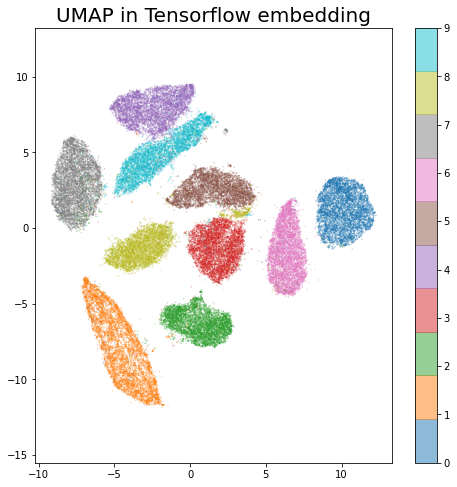

In [6]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [7]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

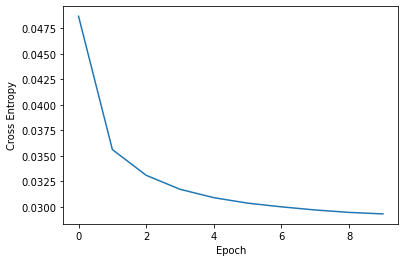

In [8]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')